In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import pandas as pd
import matplotlib.pyplot as plt
from DBconnection import DBconn

plt.style.use('ggplot')

In [2]:
conn = DBconn()

#### numero de personas que alguna vez han comprado VIP y tipo de VIP

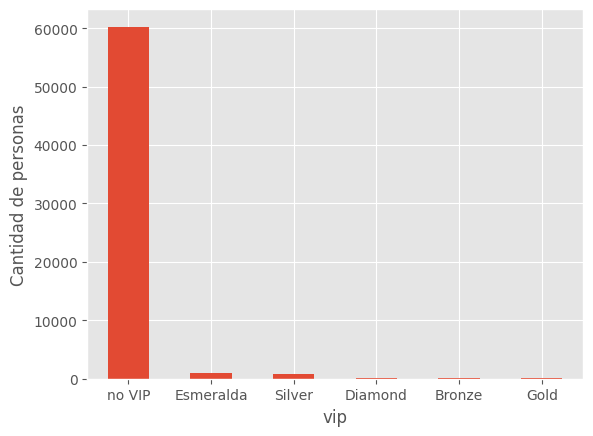

In [3]:
sql = """ 
    SELECT
        vip,
        COUNT(*) AS cantidad
    FROM
        accountdata
    GROUP BY
        vip
"""

df = conn.query(sql)

df.drop(index=6, inplace=True)
df["vip"] = df["vip"].map(lambda x: "no VIP" if x == "None" else x)

df.plot.bar(x='vip', y='cantidad', rot=0, legend=False)

plt.ylabel("Cantidad de personas")
plt.show()

#### de todas las personas que han tenido VIP, quienes actualmente tienen VIP

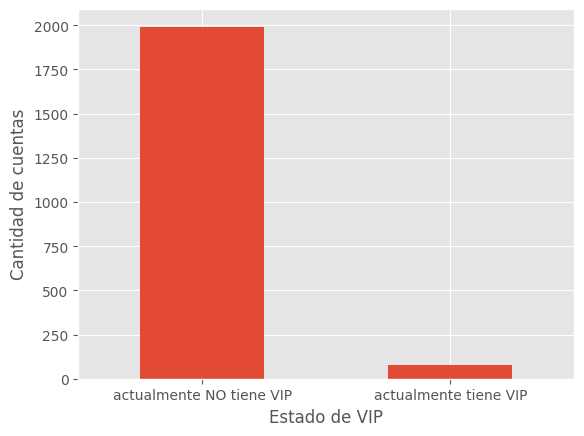

In [6]:
SQL = """
    SELECT
        IF(vipexp > CURDATE(), "actualmente tiene VIP", "actualmente NO tiene VIP")
    FROM
        accountdata
    WHERE 
        vip != "None"
    AND
        vipexp IS NOT NULL
"""

df = conn.query(SQL)

df.value_counts().plot.bar(rot=0)

plt.ylabel("Cantidad de cuentas")
plt.xlabel("Estado de VIP")
plt.show()

#### de los que han comprado el VIP, cuantas veces han comprado el VIP (info de la pasarela de pagos)

In [3]:
PATH_TO_DATA = "./../datos payU"

datosPayU = []
for file in os.listdir(PATH_TO_DATA):
    datosPayU.append( pd.read_csv(os.path.join(PATH_TO_DATA, file), sep=";") )

datosPayU = pd.concat(datosPayU, axis=0, ignore_index=True)

datosPayU.drop_duplicates(inplace=True)

datosPayU.query("`Estado de transacci?n` == 'APPROVED'", inplace=True)

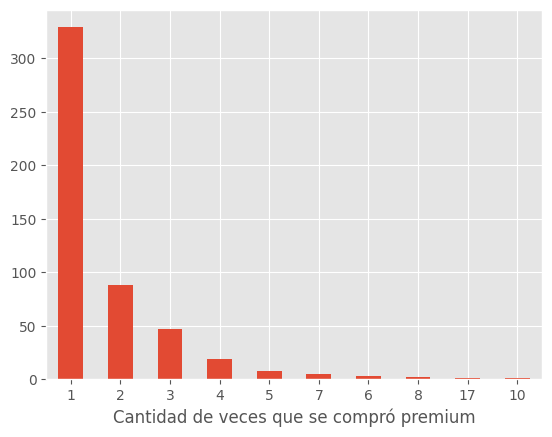

In [6]:
conteo_premium = datosPayU["Email del comprador"].value_counts().value_counts()

conteo_premium.plot.bar(rot=0)

plt.xlabel("Cantidad de veces que se compró premium")
plt.show()

In [ ]:
conn.close()